In [ ]:
import numpy as np
import pandas as pd 
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os
from keras.models import Sequential
from keras.callbacks import History 
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM, Dense, RepeatVector, Masking, TimeDistributed
from tensorflow. keras.utils import plot_model
from tensorflow.keras import backend
import numpy as np
import pandas as pd 
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os

In [ ]:
FAST_RUN = False
IMAGE_WIDTH=128
IMAGE_HEIGHT=128
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3

In [ ]:
filenames = os.listdir("/content/drive/My Drive/Data/Train")
categories = []
for filename in filenames:
    category = filename.split('_GM')[0]
    if category == 'AD':
        categories.append(1)
    else:
        categories.append(0)
print(categories[80:100])
df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
print(df.head())
print(df.tail())

        filename  category
0  AD_GM_10.jpeg         1
1  AD_GM_13.jpeg         1
2  AD_GM_15.jpeg         1
3  AD_GM_17.jpeg         1
4  AD_GM_12.jpeg         1
          filename  category
175  CN_GM_86.jpeg         0
176  CN_GM_88.jpeg         0
177  CN_GM_89.jpeg         0
178  CN_GM_90.jpeg         0
179   CN_GM_9.jpeg         0


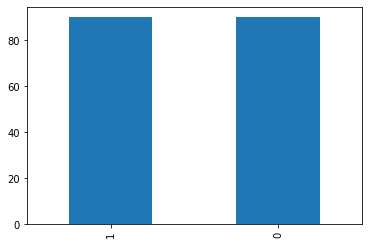

In [ ]:
df['category'].value_counts().plot.bar()

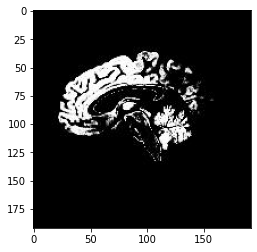

In [ ]:
sample = random.choice(filenames)
image = load_img("/content/drive/My Drive/Data/Train/"+sample)
plt.imshow(image)

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

model = Sequential()

model.add(Conv2D(8, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 126, 126, 8)       224       
_________________________________________________________________
batch_normalization_25 (Batc (None, 126, 126, 8)       32        
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 63, 63, 8)         0         
_________________________________________________________________
dropout_25 (Dropout)         (None, 63, 63, 8)         0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 61, 61, 16)        1168      
_________________________________________________________________
batch_normalization_26 (Batc (None, 61, 61, 16)        64        
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 30, 30, 16)       

In [ ]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [ ]:
earlystop = EarlyStopping(patience=10)

In [ ]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [ ]:
callbacks = [earlystop, learning_rate_reduction]

In [ ]:
df["category"] = df["category"].replace({0: 'CN', 1: 'AD'}) 

In [ ]:
print(df.head())
print(df.tail())

        filename category
0  AD_GM_10.jpeg       AD
1  AD_GM_13.jpeg       AD
2  AD_GM_15.jpeg       AD
3  AD_GM_17.jpeg       AD
4  AD_GM_12.jpeg       AD
          filename category
175  CN_GM_86.jpeg       CN
176  CN_GM_88.jpeg       CN
177  CN_GM_89.jpeg       CN
178  CN_GM_90.jpeg       CN
179   CN_GM_9.jpeg       CN


In [ ]:
train_df, validate_df = train_test_split(df, test_size=0.20, random_state=42)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

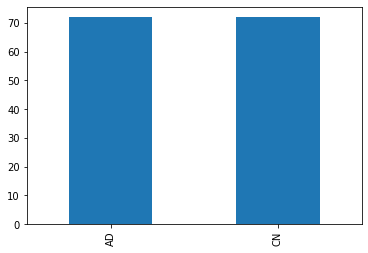

In [ ]:
train_df['category'].value_counts().plot.bar()

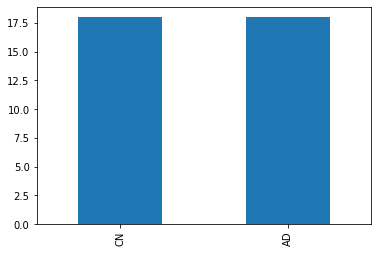

In [ ]:
validate_df['category'].value_counts().plot.bar()

In [ ]:
total_train = train_df.shape[0]
total_validate = validate_df.shape[0]
batch_size=15

In [ ]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_generator = train_datagen.flow_from_dataframe(
    train_df, 
    "/content/drive/My Drive/Data/Train/", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 143 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/dataframe_iterator.py:273: UserWarning: Found 1 invalid image filename(s) in x_col="filename". These filename(s) will be ignored.
  .format(n_invalid, x_col)


In [ ]:
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    "/content/drive/My Drive/Data/Train/", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 36 validated image filenames belonging to 2 classes.


In [ ]:
example_df = train_df.sample(n=1).reset_index(drop=True)
example_generator = train_datagen.flow_from_dataframe(
    example_df, 
    "/content/drive/My Drive/Data/Train/", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical'
)

Found 1 validated image filenames belonging to 1 classes.


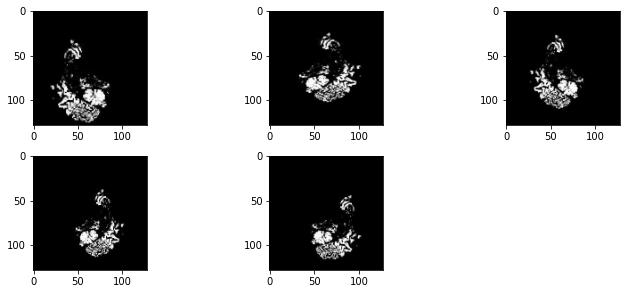

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(0, 5):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in example_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

In [ ]:
epochs=3 if FAST_RUN else 50
history = model.fit_generator(
    train_generator, 
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
    callbacks=callbacks
)

Epoch 1/50
9/9 [==============================] - 4s 406ms/step - loss: 1.3974 - accuracy: 0.4844 - val_loss: 0.6960 - val_accuracy: 0.5333
Epoch 2/50


/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:1042: RuntimeWarning: Reduce LR on plateau conditioned on metric `val_acc` which is not available. Available metrics are: val_loss,val_accuracy,loss,accuracy,lr
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


9/9 [==============================] - 3s 298ms/step - loss: 1.3354 - accuracy: 0.5037 - val_loss: 0.6791 - val_accuracy: 0.5714
Epoch 3/50
9/9 [==============================] - 2s 267ms/step - loss: 1.4010 - accuracy: 0.4959 - val_loss: 0.6994 - val_accuracy: 0.4286
Epoch 4/50
9/9 [==============================] - 3s 288ms/step - loss: 1.2627 - accuracy: 0.5312 - val_loss: 0.8390 - val_accuracy: 0.5333
Epoch 5/50
9/9 [==============================] - 2s 276ms/step - loss: 1.1846 - accuracy: 0.5391 - val_loss: 0.8759 - val_accuracy: 0.4762
Epoch 6/50
9/9 [==============================] - 3s 279ms/step - loss: 1.2419 - accuracy: 0.5037 - val_loss: 1.3531 - val_accuracy: 0.4762
Epoch 7/50
9/9 [==============================] - 2s 277ms/step - loss: 1.0939 - accuracy: 0.5547 - val_loss: 1.3218 - val_accuracy: 0.4333
Epoch 8/50
9/9 [==============================] - 2s 272ms/step - loss: 1.2831 - accuracy: 0.5234 - val_loss: 1.1145 - val_accuracy: 0.6190
Epoch 9/50
9/9 [===============

In [ ]:
model.save_weights("model.h5")

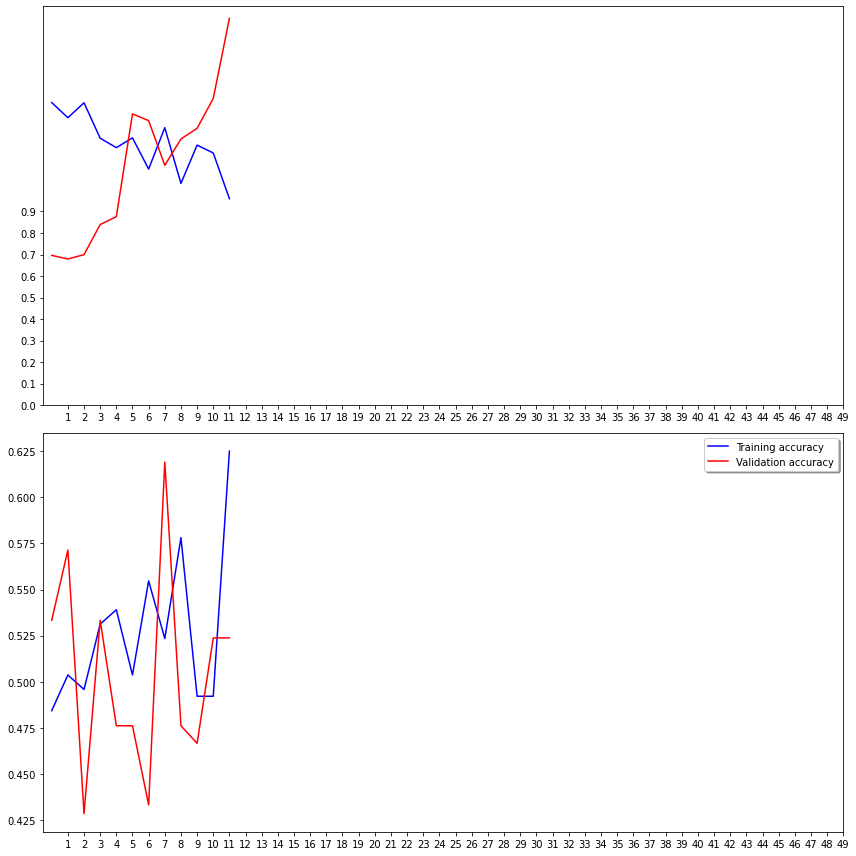

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, epochs, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, epochs, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

In [ ]:
test_filenames = os.listdir("/content/drive/My Drive/Data/Test")
test_df = pd.DataFrame({
    'filename': test_filenames
})
nb_samples = test_df.shape[0]

In [ ]:
test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(
    test_df, 
    "/content/drive/My Drive/Data/Test", 
    x_col='filename',
    y_col=None,
    class_mode=None,
    target_size=IMAGE_SIZE,
    batch_size=batch_size,
    shuffle=False
)

Found 6 validated image filenames.


In [ ]:
predict = model.predict_generator(test_generator, steps=np.ceil(nb_samples/batch_size))

In [ ]:
test_df['category'] = np.argmax(predict, axis=-1)


In [ ]:
label_map = dict((v,k) for k,v in train_generator.class_indices.items())
test_df['category'] = test_df['category'].replace(label_map)
print(test_df['category'])

0    AD
1    AD
2    AD
3    AD
4    AD
5    AD
Name: category, dtype: object


In [ ]:
test_df['category'] = test_df['category'].replace({ 'AD': 1, 'CN': 0 })


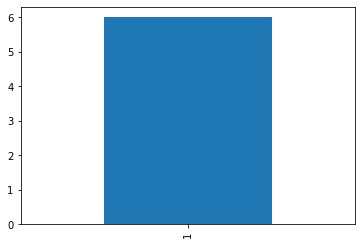

In [ ]:
test_df['category'].value_counts().plot.bar()

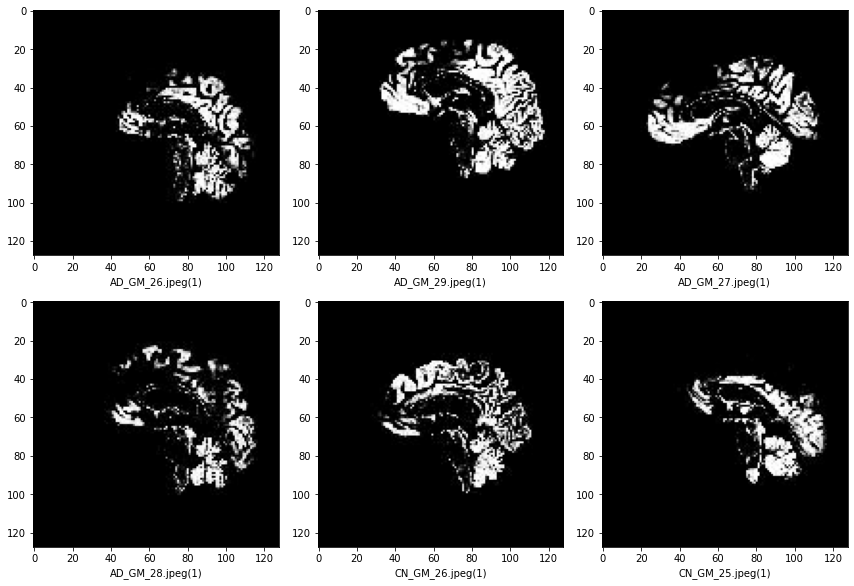

In [ ]:
sample_test = test_df.head(18)
sample_test.head()
plt.figure(figsize=(12, 24))
for index, row in sample_test.iterrows():
    filename = row['filename']
    category = row['category']
    img = load_img("/content/drive/My Drive/Data/Test/"+filename, target_size=IMAGE_SIZE)
    plt.subplot(6, 3, index+1)
    plt.imshow(img)
    plt.xlabel(filename + '(' + "{}".format(category) + ')' )
plt.tight_layout()
plt.show()